Task 1

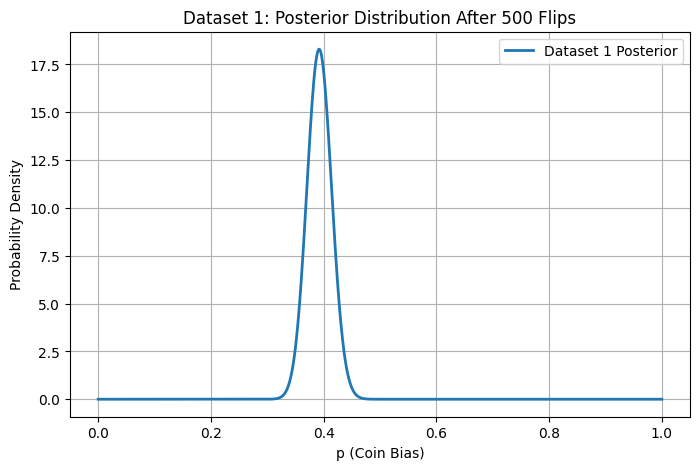

Dataset 1:
  Final posterior expectation: 0.3924
  Final posterior variance (Beta): 4.7401e-04
  Variance from Fisher information: 4.7667e-04



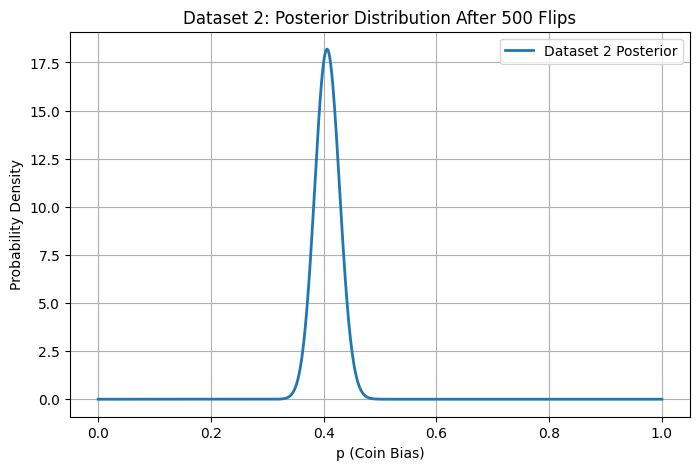

Dataset 2:
  Final posterior expectation: 0.4064
  Final posterior variance (Beta): 4.7959e-04
  Variance from Fisher information: 4.8233e-04



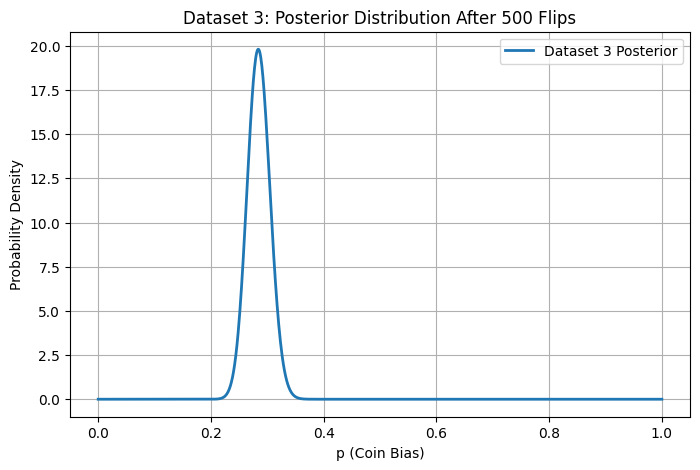

Dataset 3:
  Final posterior expectation: 0.2849
  Final posterior variance (Beta): 4.0500e-04
  Variance from Fisher information: 4.0669e-04



In [ ]:
# a)

import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def load_dataset(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data

def update_posterior(data, batch_size=50):
    num_batches = len(data) // batch_size
    p_vals = np.linspace(0, 1, 1000)
    posteriors = []
    expectations = []
    variances = []
    fisher_variances = []
    cumulative_heads = 0
    for i in range(num_batches):
        batch = data[i*batch_size:(i+1)*batch_size]
        cumulative_heads += sum(batch)
        N_k = (i+1)*batch_size
        M_k = cumulative_heads
        alpha = M_k + 1
        beta_param = N_k - M_k + 1
        posterior_density = beta.pdf(p_vals, alpha, beta_param)
        posteriors.append(posterior_density)
        exp_val = alpha / (alpha + beta_param)
        var_val = (alpha * beta_param) / (((alpha + beta_param)**2) * (alpha + beta_param + 1))
        expectations.append(exp_val)
        variances.append(var_val)
        p_mle = M_k / N_k
        fisher_var = p_mle * (1 - p_mle) / N_k
        fisher_variances.append(fisher_var)
    return p_vals, posteriors, expectations, variances, fisher_variances

data1 = load_dataset('dataset_1.json')
data2 = load_dataset('dataset_2.json')
data3 = load_dataset('dataset_3.json')

datasets = [data1, data2, data3]
labels = ['Dataset 1', 'Dataset 2', 'Dataset 3']

for idx, data in enumerate(datasets):
    p_vals, posteriors, exps, vars_, fisher_vars = update_posterior(data)
    plt.figure(figsize=(8, 5))
    plt.plot(p_vals, posteriors[-1], lw=2, label=f'{labels[idx]} Posterior')
    plt.xlabel('p (Coin Bias)')
    plt.ylabel('Probability Density')
    plt.title(f'{labels[idx]}: Posterior Distribution After 500 Flips')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"{labels[idx]}:")
    print(f"  Final posterior expectation: {exps[-1]:.4f}")
    print(f"  Final posterior variance (Beta): {vars_[-1]:.4e}")
    print(f"  Variance from Fisher information: {fisher_vars[-1]:.4e}\n")


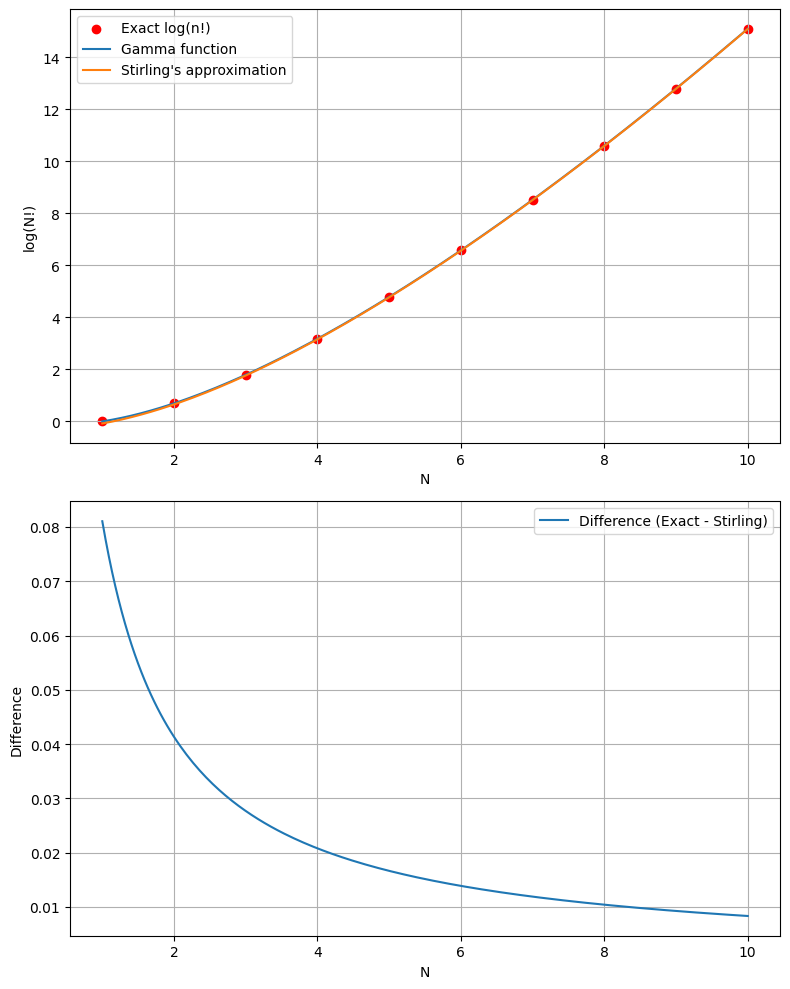

In [ ]:
# d)

import math

N_int = np.arange(1, 11)
log_factorial_exact = np.array([math.lgamma(n+1) for n in N_int])
N_smooth = np.linspace(1, 10, 200)
log_factorial_exact_smooth = np.array([math.lgamma(x+1) for x in N_smooth])
stirling_approx = N_smooth * np.log(N_smooth) - N_smooth + 0.5 * np.log(2 * np.pi * N_smooth)
difference = log_factorial_exact_smooth - stirling_approx

fig, axs = plt.subplots(2, 1, figsize=(8, 10))
axs[0].scatter(N_int, log_factorial_exact, color='red', label='Exact log(n!)')
axs[0].plot(N_smooth, log_factorial_exact_smooth, label='Gamma function')
axs[0].plot(N_smooth, stirling_approx, label="Stirling's approximation")
axs[0].set_xlabel('N')
axs[0].set_ylabel('log(N!)')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(N_smooth, difference, label='Difference (Exact - Stirling)')
axs[1].set_xlabel('N')
axs[1].set_ylabel('Difference')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


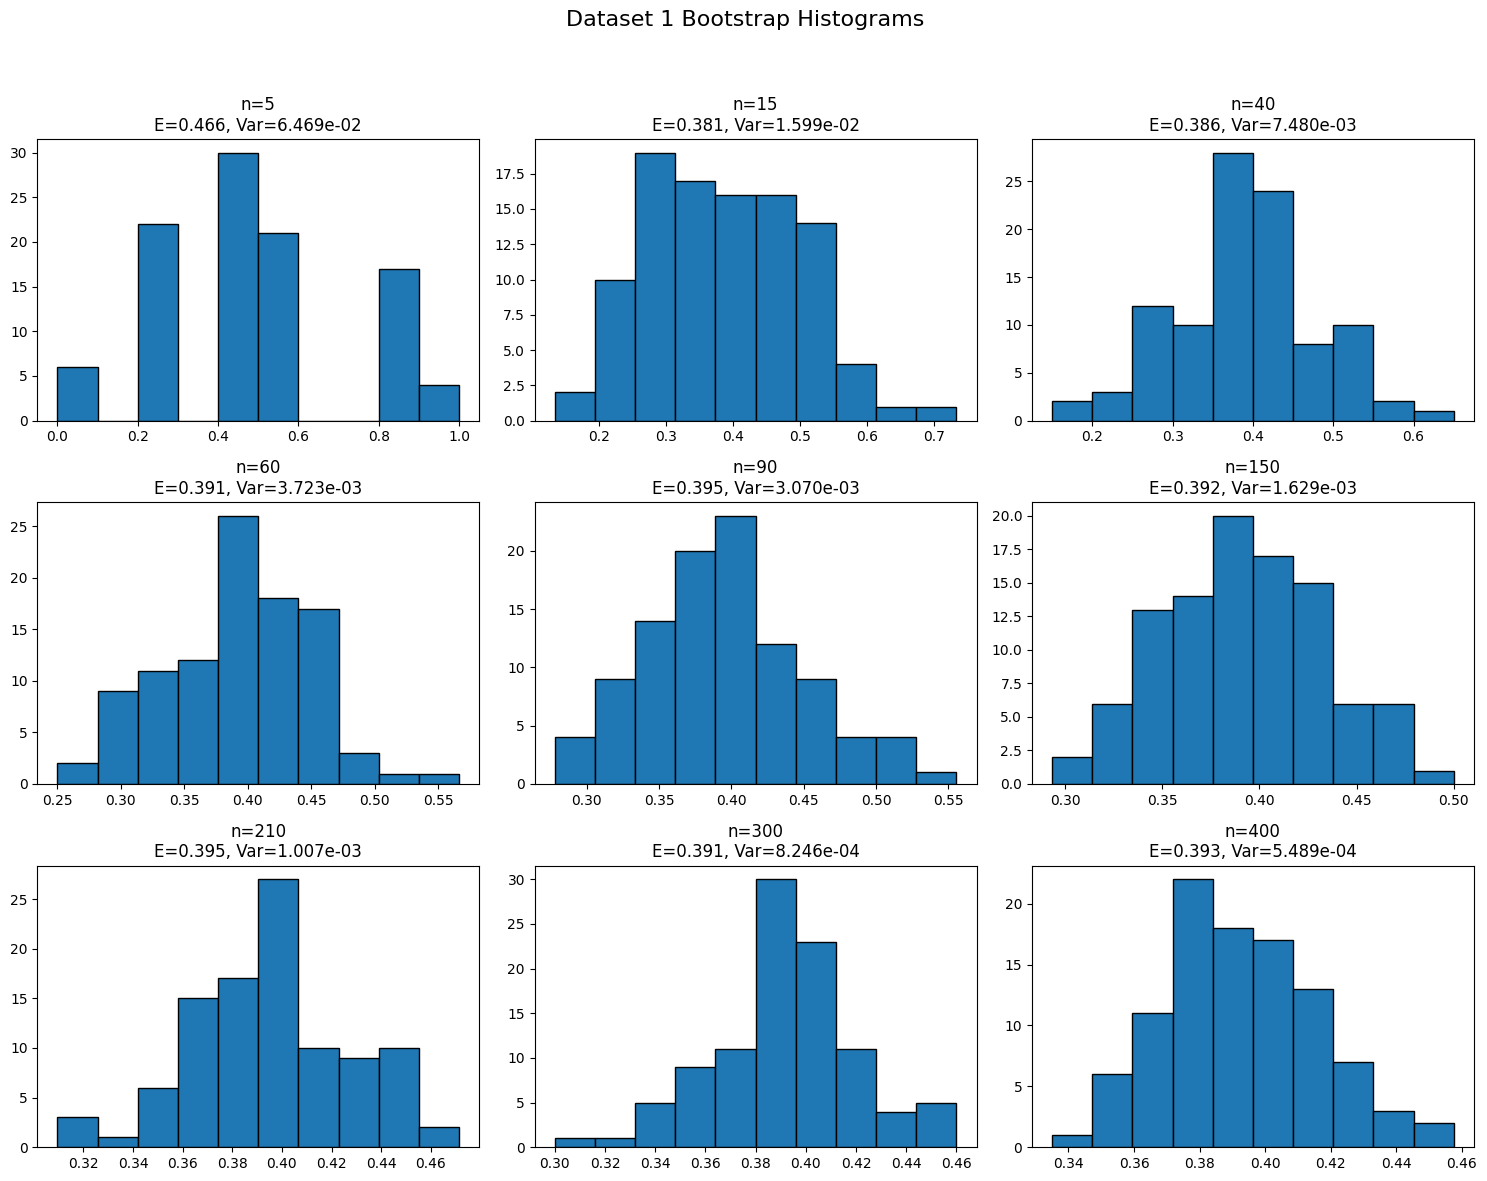

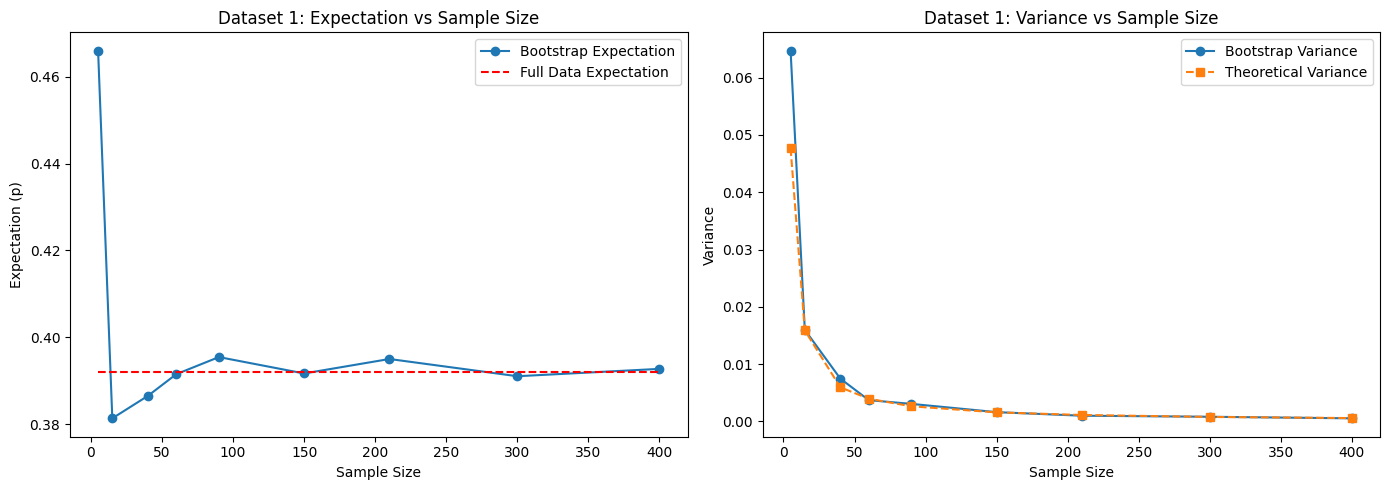

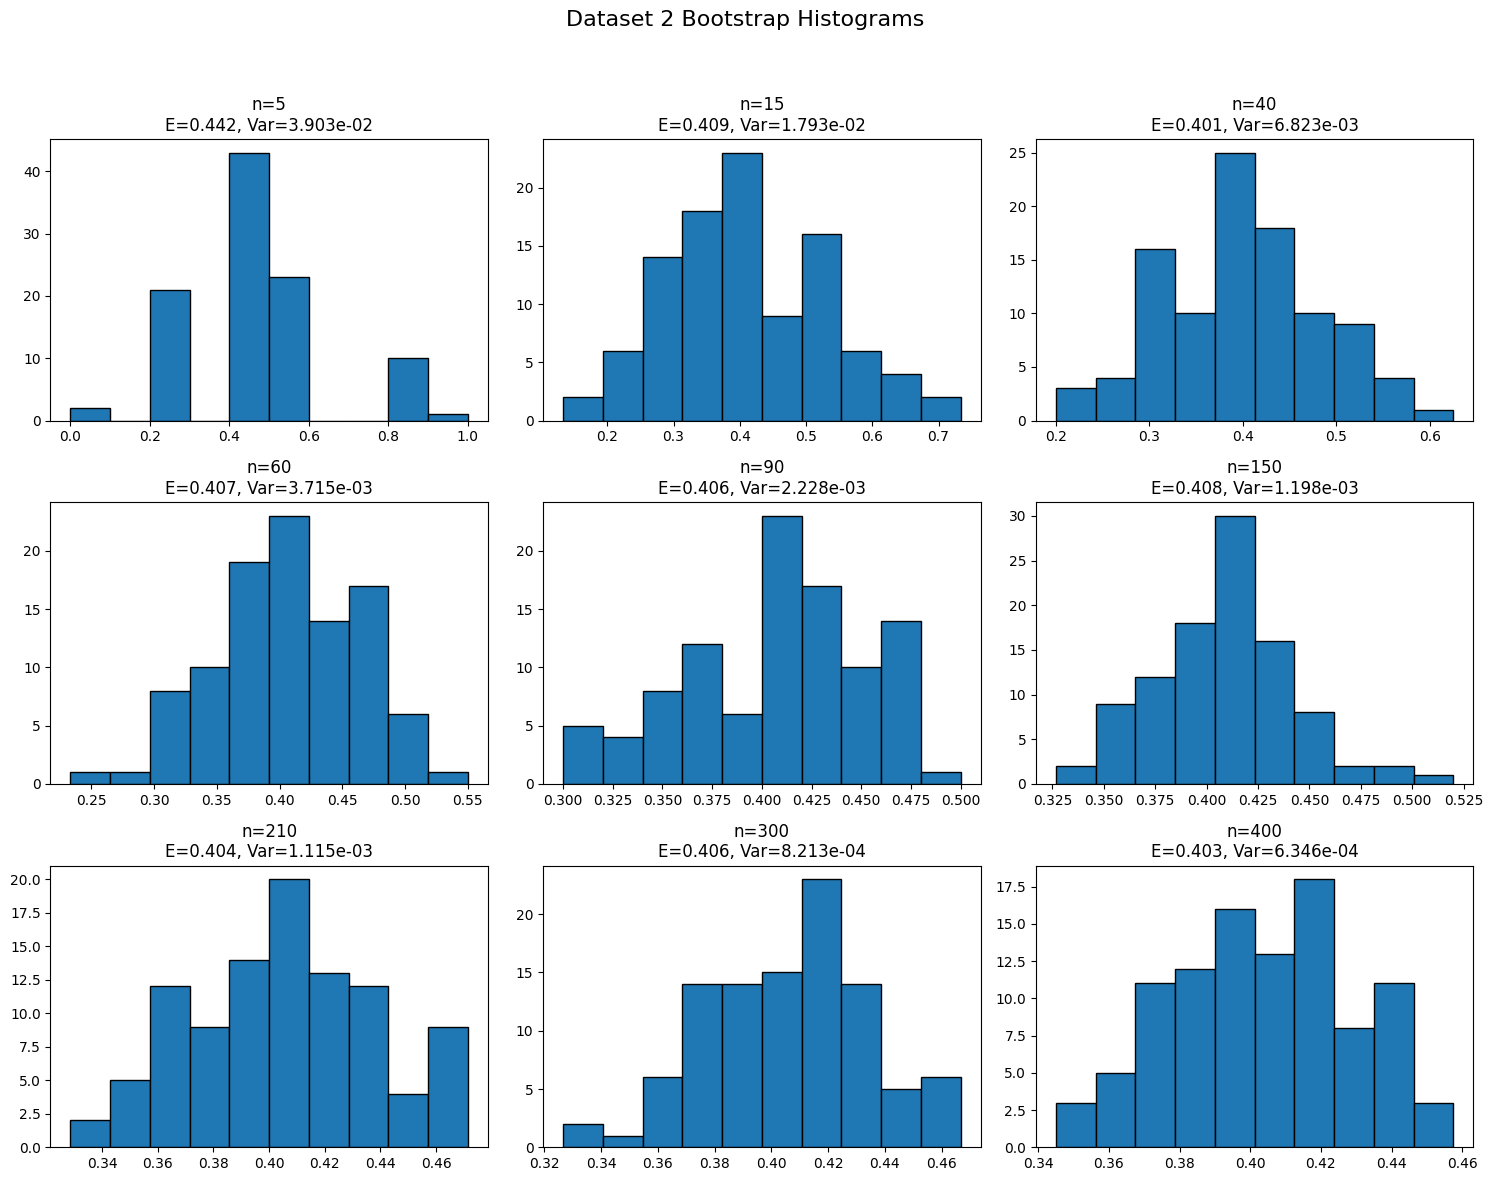

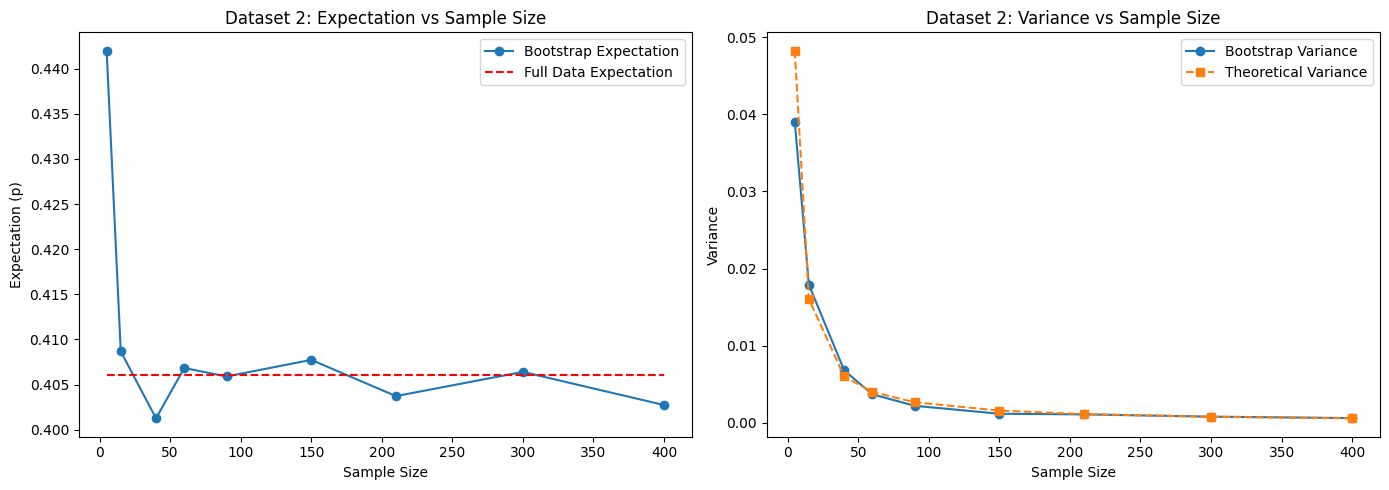

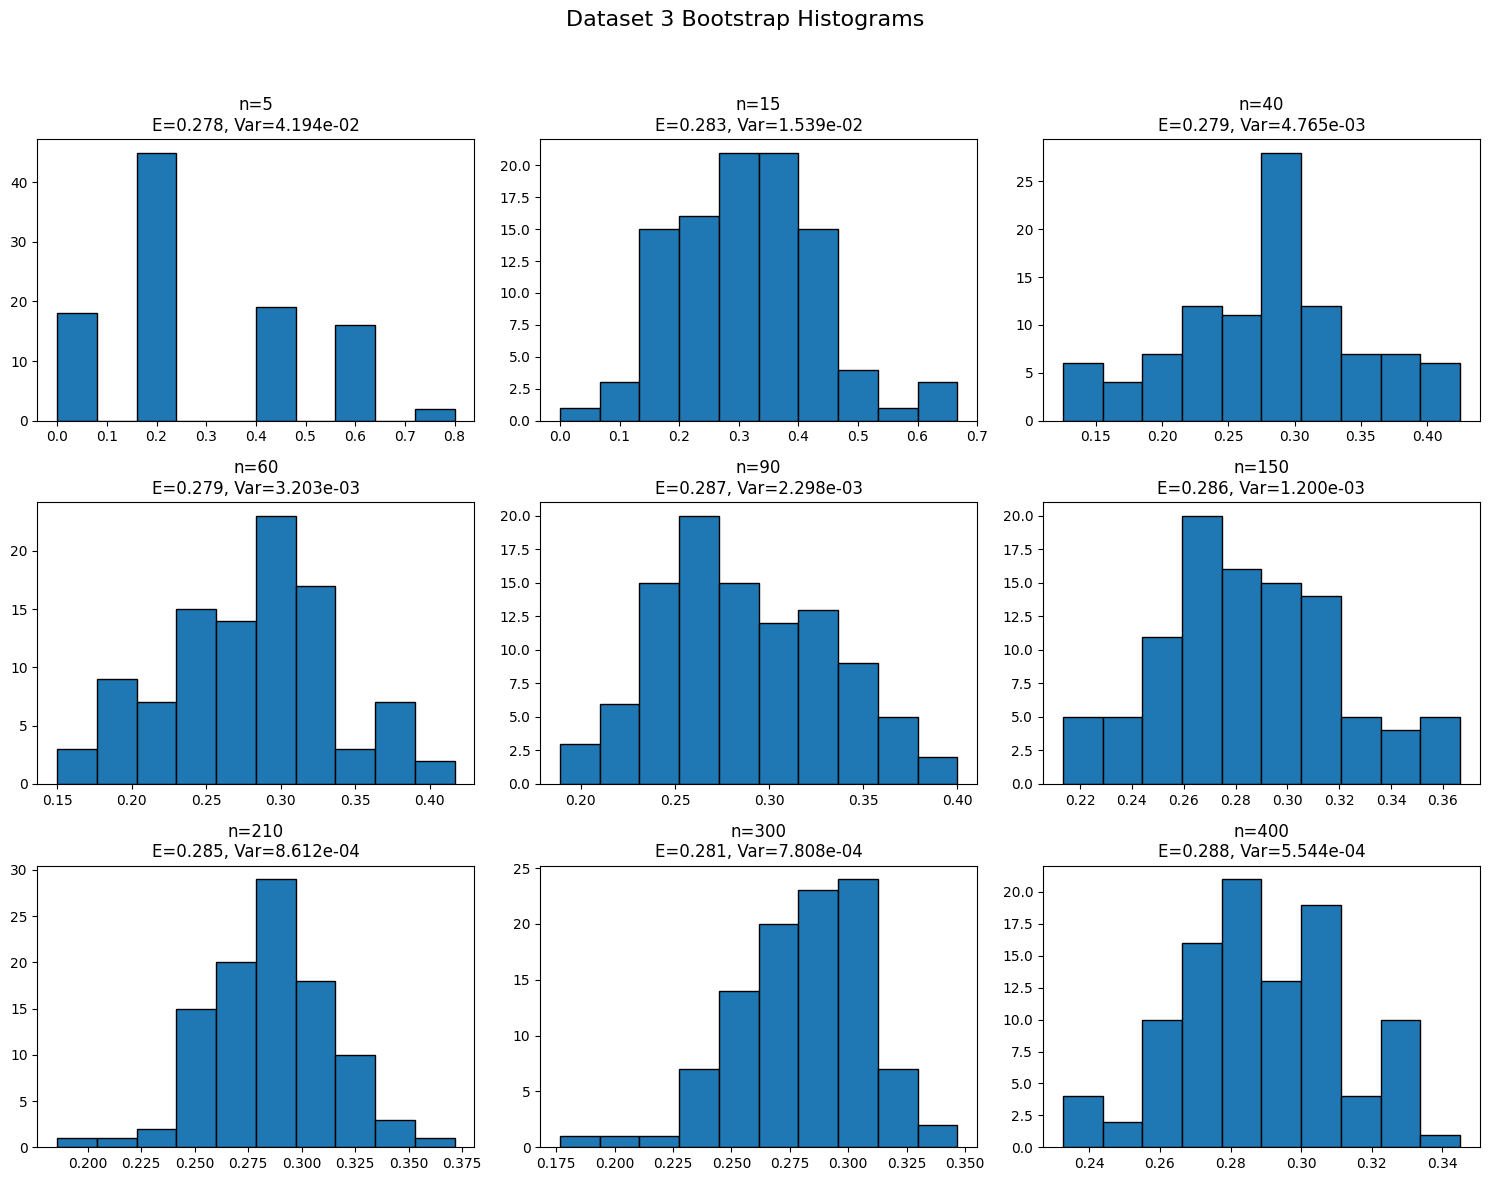

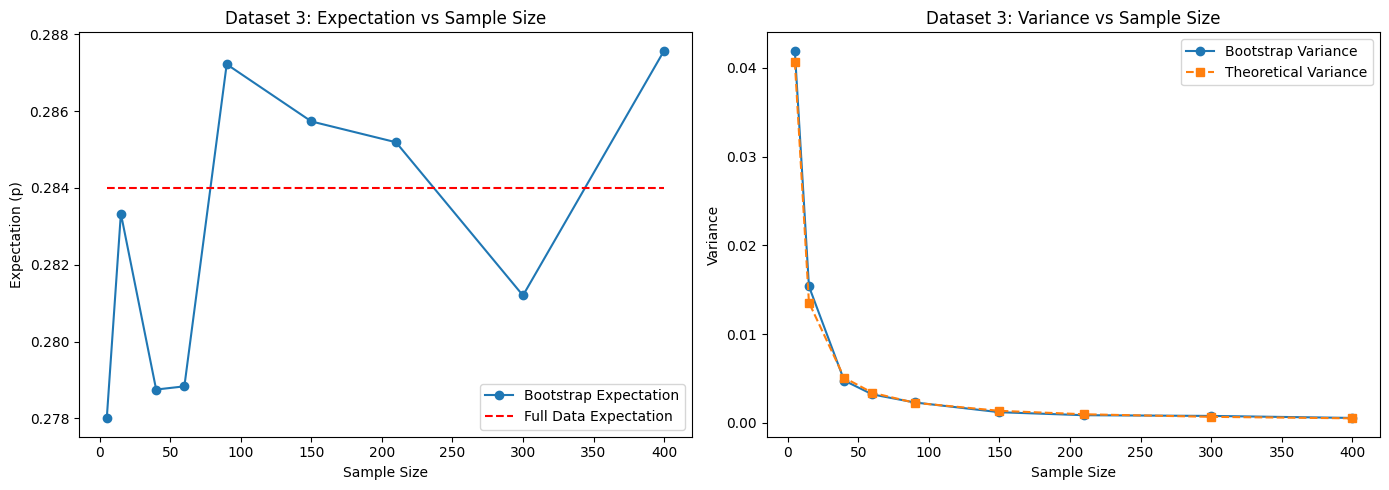

In [7]:
# e)

def load_dataset(filename):
    with open(filename, 'r') as f:
        return json.load(f)

data1 = np.array(load_dataset('dataset_1.json'))
data2 = np.array(load_dataset('dataset_2.json'))
data3 = np.array(load_dataset('dataset_3.json'))

datasets = [data1, data2, data3]
labels = ['Dataset 1', 'Dataset 2', 'Dataset 3']
sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]
n_bootstrap = 100

for idx, data in enumerate(datasets):
    p_true = np.mean(data)
    bs_expectations = []
    bs_variances = []
    bs_means = {}
    
    for n in sample_sizes:
        means = []
        for _ in range(n_bootstrap):
            sample = np.random.choice(data, size=n, replace=True)
            means.append(np.mean(sample))
        means = np.array(means)
        bs_means[n] = means
        bs_expectations.append(np.mean(means))
        bs_variances.append(np.var(means, ddof=1))
    
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))
    axs = axs.flatten()
    for i, n in enumerate(sample_sizes):
        axs[i].hist(bs_means[n], bins=10, edgecolor='black')
        exp_val = np.mean(bs_means[n])
        var_val = np.var(bs_means[n], ddof=1)
        axs[i].set_title(f"n={n}\nE={exp_val:.3f}, Var={var_val:.3e}")
    plt.suptitle(f"{labels[idx]} Bootstrap Histograms", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    bs_expectations = np.array(bs_expectations)
    bs_variances = np.array(bs_variances)
    sample_sizes_arr = np.array(sample_sizes)
    theoretical_variances = p_true * (1 - p_true) / sample_sizes_arr
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    axs[0].plot(sample_sizes, bs_expectations, 'o-', label='Bootstrap Expectation')
    axs[0].hlines(p_true, min(sample_sizes), max(sample_sizes), colors='r', linestyles='dashed', label='Full Data Expectation')
    axs[0].set_xlabel('Sample Size')
    axs[0].set_ylabel('Expectation (p)')
    axs[0].set_title(f"{labels[idx]}: Expectation vs Sample Size")
    axs[0].legend()
    
    axs[1].plot(sample_sizes, bs_variances, 'o-', label='Bootstrap Variance')
    axs[1].plot(sample_sizes, theoretical_variances, 's--', label='Theoretical Variance')
    axs[1].set_xlabel('Sample Size')
    axs[1].set_ylabel('Variance')
    axs[1].set_title(f"{labels[idx]}: Variance vs Sample Size")
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()


Task 2

Vacuum dataset:
  MLE λ = 1.2530
  Fisher variance = 1.2502e-05 (std error = 3.5358e-03)

Cavity dataset (mixture model):
  MLE f       = 0.2024
  MLE λ       = 1.2556
  MLE μ       = 6.9999
  MLE σ       = 0.9959

Estimated parameter uncertainties from the Fisher information (Hessian):
  σ_f     = 1.4387e-03
  σ_λ     = 5.7565e-03
  σ_μ     = 8.4394e-03
  σ_σ     = 6.7354e-03


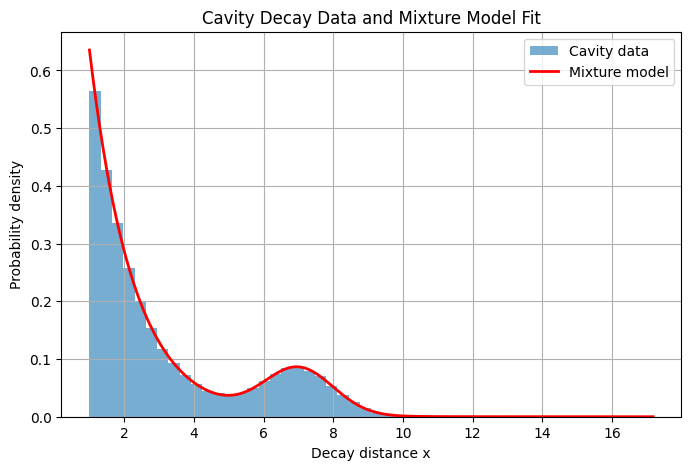

In [10]:
# a)

from scipy.optimize import minimize
from math import pi, sqrt

def load_dataset(filename):
    with open(filename, 'r') as f:
        return np.array(json.load(f))

vacuum_data = load_dataset('Vacuum_decay_dataset.json')
cavity_data = load_dataset('Cavity_decay_dataset.json')

N_vac = len(vacuum_data)
lambda_hat_vac = np.mean(vacuum_data - 1)
var_lambda_vac = lambda_hat_vac**2 / N_vac

print("Vacuum dataset:")
print(f"  MLE λ = {lambda_hat_vac:.4f}")
print(f"  Fisher variance = {var_lambda_vac:.4e} (std error = {sqrt(var_lambda_vac):.4e})\n")

def nll_cavity(theta, data):
    f, lam, mu, sigma = theta
    if lam <= 0 or sigma <= 0 or not (0 <= f <= 1):
        return np.inf
    expo = (1 - f) * (1/lam) * np.exp(-(data - 1) / lam)
    gauss = f * (1/(sigma * np.sqrt(2 * pi))) * np.exp(- (data - mu)**2 / (2 * sigma**2))
    mix = expo + gauss
    return -np.sum(np.log(mix + 1e-12))

f0 = 0.5
lam0 = lambda_hat_vac
mu0 = np.mean(cavity_data)
sigma0 = np.std(cavity_data)
theta0 = [f0, lam0, mu0, sigma0]
bounds = [(0, 1), (1e-6, None), (None, None), (1e-6, None)]

result = minimize(nll_cavity, theta0, args=(cavity_data,), bounds=bounds, method='L-BFGS-B')
if not result.success:
    print("Minimization did not converge.")
theta_hat = result.x
f_hat, lam_hat_cav, mu_hat, sigma_hat = theta_hat

print("Cavity dataset (mixture model):")
print(f"  MLE f       = {f_hat:.4f}")
print(f"  MLE λ       = {lam_hat_cav:.4f}")
print(f"  MLE μ       = {mu_hat:.4f}")
print(f"  MLE σ       = {sigma_hat:.4f}")

def hessian(fun, theta, data, eps=1e-5):
    theta = np.array(theta)
    n = theta.size
    H = np.zeros((n, n))
    f0 = fun(theta, data)
    for i in range(n):
        theta_ip = theta.copy()
        theta_ip[i] += eps
        f_ip = fun(theta_ip, data)
        for j in range(i, n):
            theta_ijp = theta.copy()
            theta_ijp[i] += eps
            theta_ijp[j] += eps
            f_ijp = fun(theta_ijp, data)
            theta_jp = theta.copy()
            theta_jp[j] += eps
            f_jp = fun(theta_jp, data)
            H[i, j] = (f_ijp - f_ip - f_jp + f0) / (eps**2)
            H[j, i] = H[i, j]
    return H

H = hessian(nll_cavity, theta_hat, cavity_data)
cov_matrix = np.linalg.inv(H)
std_errors = np.sqrt(np.diag(cov_matrix))

print("\nEstimated parameter uncertainties from the Fisher information (Hessian):")
print(f"  σ_f     = {std_errors[0]:.4e}")
print(f"  σ_λ     = {std_errors[1]:.4e}")
print(f"  σ_μ     = {std_errors[2]:.4e}")
print(f"  σ_σ     = {std_errors[3]:.4e}")

x_vals = np.linspace(min(cavity_data), max(cavity_data), 500)
expo_pdf = (1 - f_hat) * (1/lam_hat_cav) * np.exp(-(x_vals - 1) / lam_hat_cav)
gauss_pdf = f_hat * (1/(sigma_hat * np.sqrt(2 * pi))) * np.exp(- (x_vals - mu_hat)**2 / (2 * sigma_hat**2))
mixture_pdf = expo_pdf + gauss_pdf

plt.figure(figsize=(8, 5))
plt.hist(cavity_data, bins=50, density=True, alpha=0.6, label='Cavity data')
plt.plot(x_vals, mixture_pdf, 'r-', lw=2, label='Mixture model')
plt.xlabel('Decay distance x')
plt.ylabel('Probability density')
plt.title('Cavity Decay Data and Mixture Model Fit')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# b)

from scipy.stats import chi2

f_lower = f_hat - 1.96 * std_errors[0]
f_upper = f_hat + 1.96 * std_errors[0]
print(f"95% CI for f: [{f_lower:.4f}, {f_upper:.4f}]")
if f_lower > 0:
    print("Reject H0: f = 0 with 95% confidence (additional decay contribution exists).")
else:
    print("Cannot reject H0: f = 0 at 95% confidence.")

lam_null = np.mean(cavity_data - 1)
LL_null = - (len(cavity_data) * np.log(lam_null) + np.sum(cavity_data - 1) / lam_null)
LL_full = -result.fun
TS = 2 * (LL_full - LL_null)
p_value = 0.5 * (1 + (1 - chi2.cdf(TS, 1)))
print(f"Likelihood Ratio Test Statistic: {TS:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: f = 0 with 95% confidence (additional decay contribution exists).")
else:
    print("Cannot reject H0: f = 0 at 95% confidence.")


95% CI for f: [0.1996, 0.2052]
Reject H0: f = 0 with 95% confidence (additional decay contribution exists).
Likelihood Ratio Test Statistic: 29633.3357, p-value: 0.5000
Cannot reject H0: f = 0 at 95% confidence.
